## Import statements

In [246]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

## Constants

In [247]:
GRAYSCALE = 1
IMAGE_SIZE = 28
NUM_CLASSES = 10

## Loading MNIST dataset

In [248]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Preprocessing: Caching and prefetching

In [249]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=len(train_images))
train_dataset = train_dataset.batch(128)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE) 

## Defining CNN model and compilation

In [250]:
# Resizing and rescaling layer
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [251]:
# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(factor=0.1),
    tf.keras.layers.RandomZoom(0.2),
])

In [252]:
# Define the CNN model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, GRAYSCALE)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax'),
])

# Build the model
model.build(input_shape=(None, 28, 28, 1))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Print model summary
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_62 (Sequential)  (None, 28, 28, 1)         0         
                                                                 
 sequential_63 (Sequential)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_124 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_85 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                               

## Training CNN model

In [253]:
model.fit(train_dataset, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 50s 104ms/step - loss: 0.2195 - sparse_categorical_accuracy: 0.9338
Epoch 2/20
469/469 [==============================] - 52s 111ms/step - loss: 0.0577 - sparse_categorical_accuracy: 0.9817
Epoch 3/20
469/469 [==============================] - 50s 107ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9876
Epoch 4/20
469/469 [==============================] - 60s 127ms/step - loss: 0.0334 - sparse_categorical_accuracy: 0.9895
Epoch 5/20
469/469 [==============================] - 264s 564ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9911
Epoch 6/20
469/469 [==============================] - 50s 106ms/step - loss: 0.0247 - sparse_categorical_accuracy: 0.9919
Epoch 7/20
469/469 [==============================] - 57s 122ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9931
Epoch 8/20
469/469 [==============================] - 37s 79ms/step - loss: 0.0191 - sparse_categorical_accuracy: 0.9940
Epoch 9/20
469/469 [====

## Saving CNN model

In [254]:
model.save('models/mnist_cnn_model.keras')

## Making predictions with CNN model

In [255]:
# Preprocessing of test data (optional)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = train_dataset.shuffle(buffer_size=len(test_images))
test_dataset = train_dataset.batch(128)
test_dataset = train_dataset.cache()
test_dataset = train_dataset.prefetch(tf.data.AUTOTUNE) 

In [256]:
# Prediction of test data
predictions = model.predict(test_dataset)
predicted_labels = tf.argmax(predictions, axis=1)

469/469 [==============================] - 14s 31ms/step


## Comparing predictions and actual values

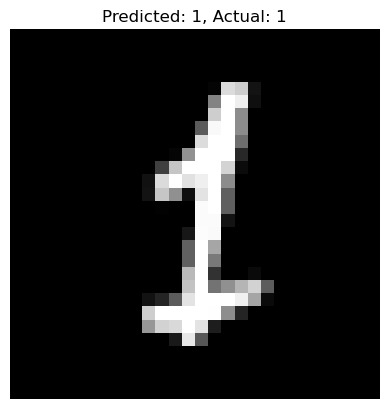

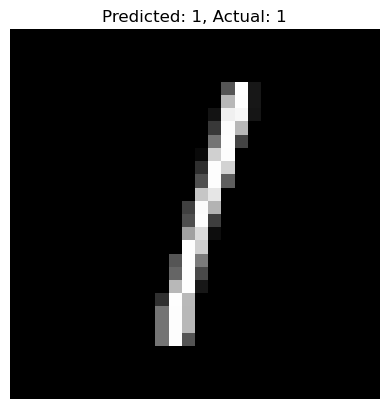

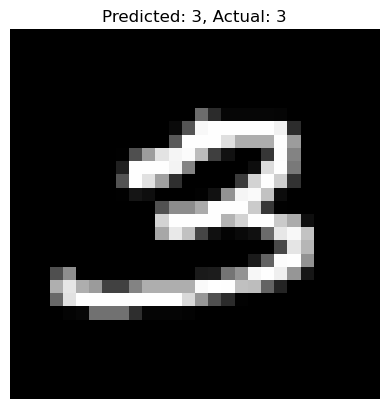

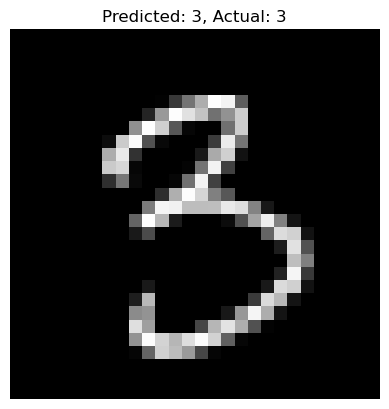

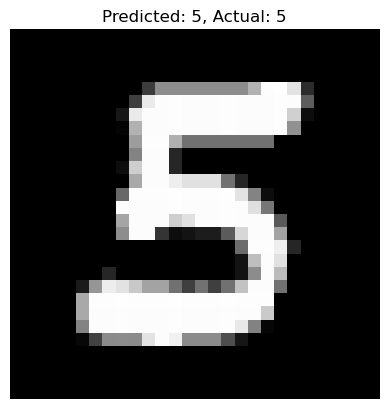

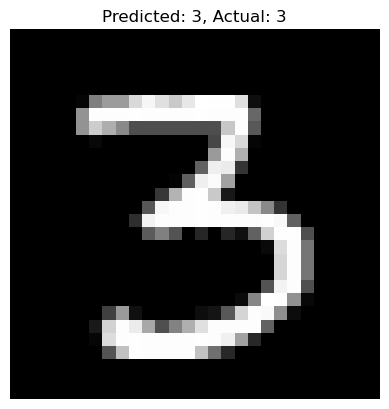

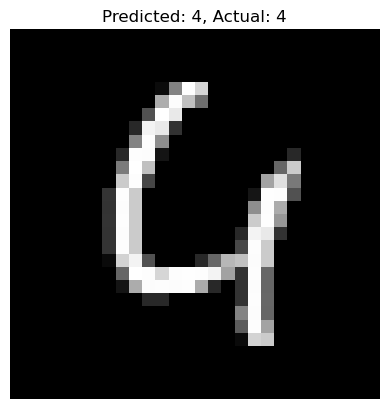

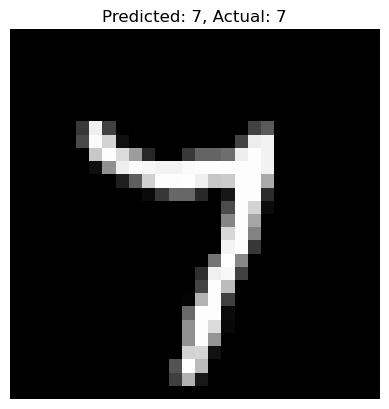

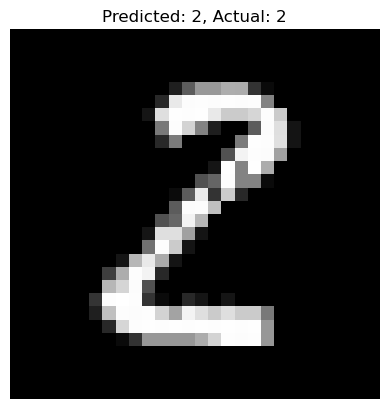

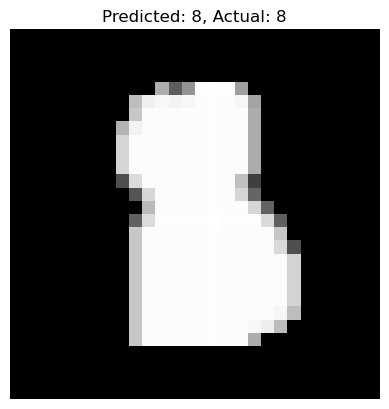

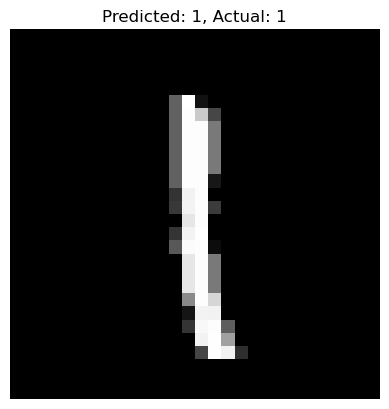

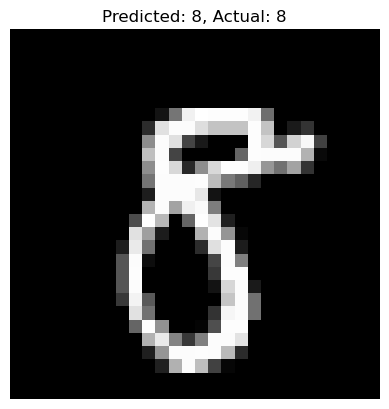

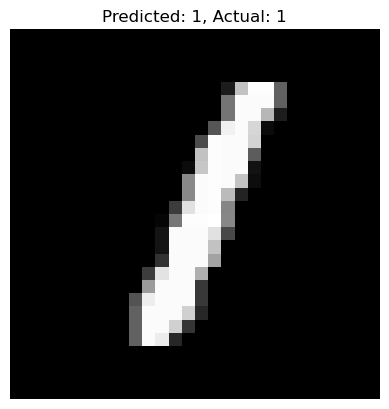

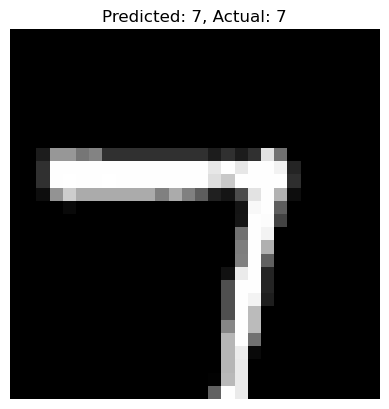

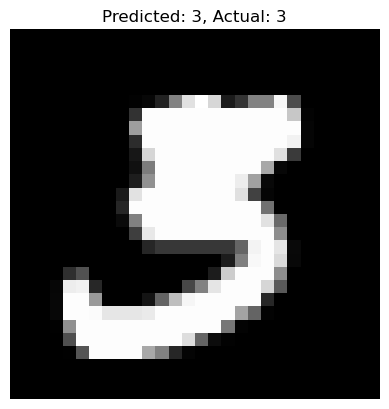

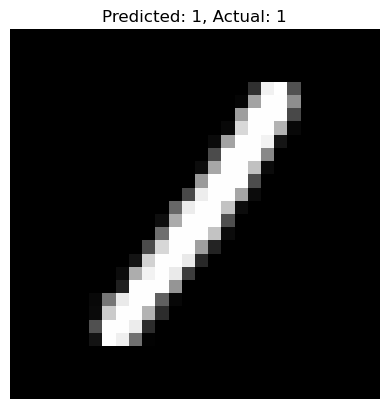

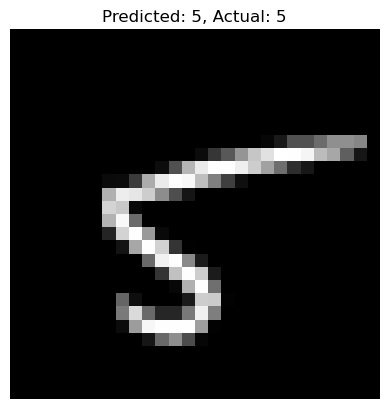

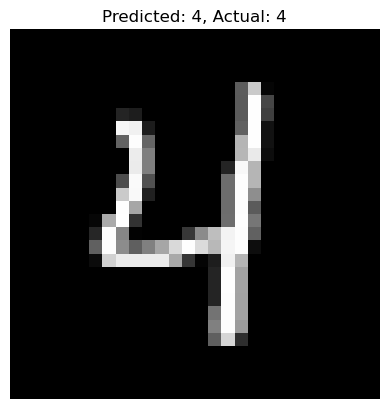

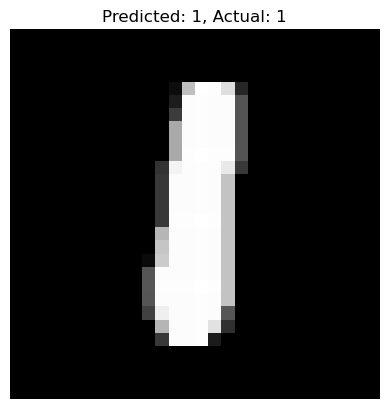

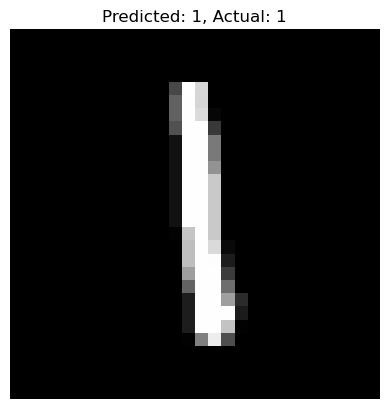

In [257]:
# Plotting images
images = [batch_images for batch_images, batch_labels in test_dataset]
labels = [batch_labels for batch_images, batch_labels in test_dataset]
for i in range(20):
    plt.imshow(images[0][i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}, Actual: {labels[0][i]}')
    plt.axis('off')
    plt.show()

In [261]:
# Read grayscale image bytes from a file
my_images = []
for i in range(10):
    with tf.io.gfile.GFile(f'my_data/{i}.png', 'rb') as f:
        image_bytes = f.read()
    my_images.append(tf.image.decode_image(image_bytes, channels=1))

In [264]:
# Prediction of my drawings
my_predictions = model.predict(np.array(my_images))
predicted_labels = tf.argmax(my_predictions, axis=1)

1/1 [==============================] - 0s 20ms/step


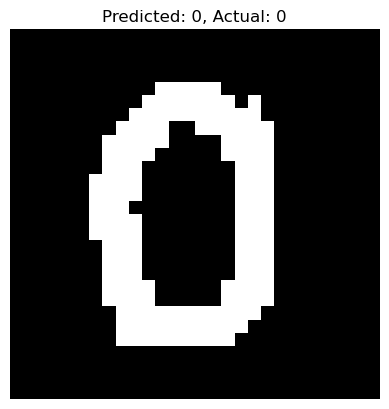

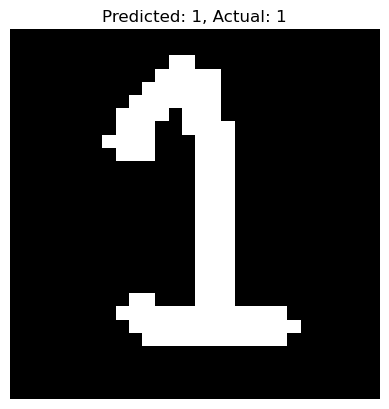

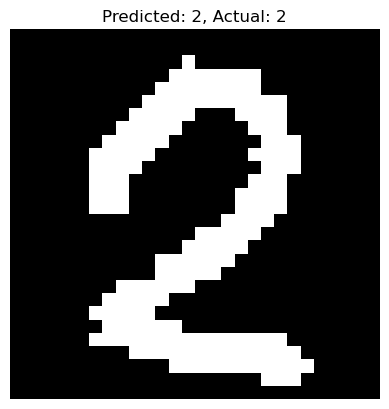

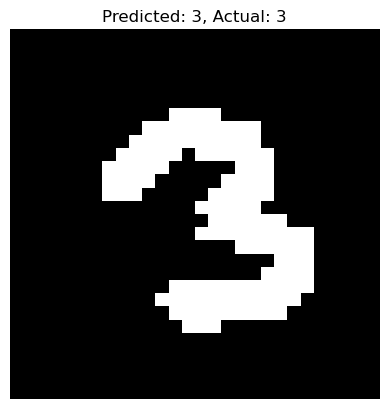

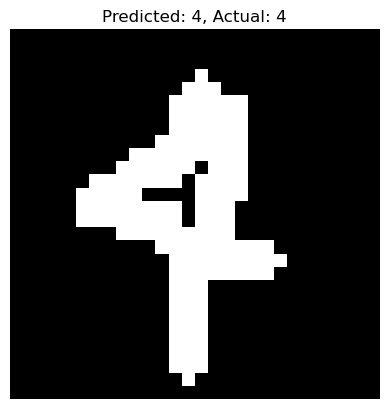

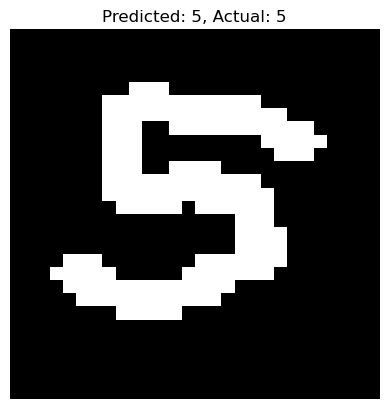

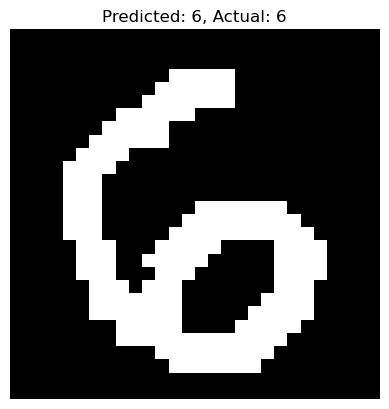

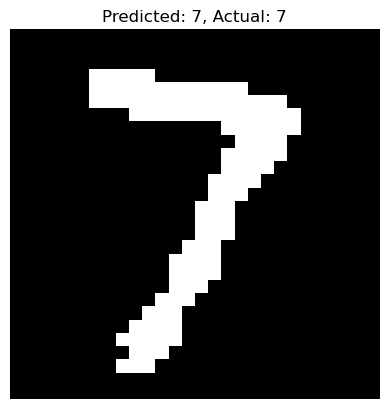

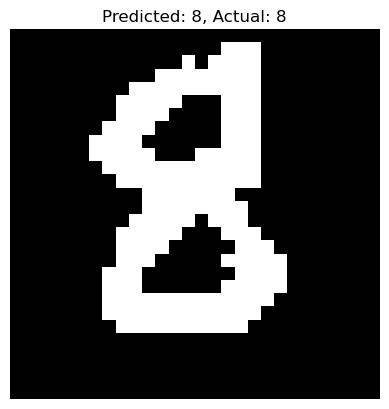

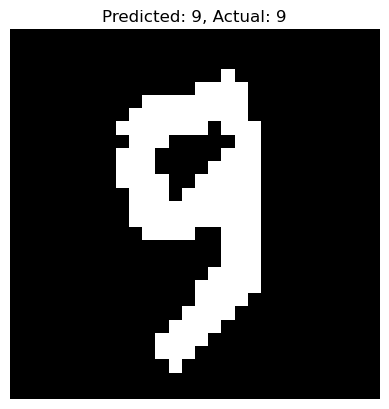

In [269]:
# Plot results of classification on my images
for i in range(NUM_CLASSES):
    plt.imshow(my_images[i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}, Actual: {i}')
    plt.axis('off')
    plt.show()